# Comparando SVM com outros algoritmos (Regressão - Preços Casas)

In [1]:
import trab03_utils as util

ds_dadosbrutos = util.getDSPriceHousing()
ds_dadosbrutos.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [2]:
import autoML

automl = autoML.AutoML(ds_dadosbrutos, 'Price'
                             , min_x_y_correlation_rate=0.1
                             , n_features_threshold=0.75)

dfResults = automl.getResults()
dfResults.head(10)

,algorithm,features,n_features,train_time,mem_max,r2,neg_mean_absolute_error,neg_mean_squared_error
0,LinearRegression,"(Avg. Area Income, Avg. Area House Age, Avg. A...",4,3.635493,192.222656,0.923135,-0.033069,-0.001662
1,LinearRegression,"(Avg. Area Income, Avg. Area House Age, Avg. A...",5,3.025283,192.242188,0.922984,-0.033118,-0.001665
2,SVR,"(Avg. Area Income, Avg. Area House Age, Avg. A...",4,2.243964,195.398438,0.867819,-0.040915,-0.002887
3,SVR,"(Avg. Area Income, Avg. Area House Age, Avg. A...",5,2.183558,195.710938,0.864186,-0.042672,-0.002954
4,KNeighborsRegressor,"(Avg. Area Income, Avg. Area House Age, Avg. A...",4,1.988533,194.480469,0.863334,-0.043200,-0.002967
5,LinearRegression,"(Avg. Area Income, Avg. Area House Age, Avg. A...",4,3.613806,192.398438,0.833811,-0.047328,-0.003607
6,KNeighborsRegressor,"(Avg. Area Income, Avg. Area House Age, Avg. A...",5,2.339380,194.746094,0.819317,-0.049846,-0.003932
7,SVR,"(Avg. Area Income, Avg. Area House Age, Avg. A...",4,1.321730,199.402344,0.803286,-0.052022,-0.004272
8,LinearRegression,"(Avg. Area Income, Avg. Area House Age, Avg. A...",4,2.942811,192.027344,0.750280,-0.059015,-0.005416
9,KNeighborsRegressor,"(Avg. Area Income, Avg. Area House Age, Avg. A...",4,2.106921,194.593750,0.741512,-0.059664,-0.005614


In [3]:
dfGroupBy_algorithm = dfResults.groupby('algorithm').mean().sort_values('r2', ascending=False)
dfGroupBy_algorithm

,train_time,mem_max,r2,neg_mean_absolute_error,neg_mean_squared_error
algorithm,,,,,
LinearRegression,3.484428,192.291667,0.771019,-0.053380,-0.004964
SVR,1.751158,202.186849,0.722552,-0.059440,-0.006034
KNeighborsRegressor,2.246106,194.664714,0.673620,-0.065353,-0.007096
DecisionTreeRegressor,1.946380,194.248698,0.429521,-0.084868,-0.012517


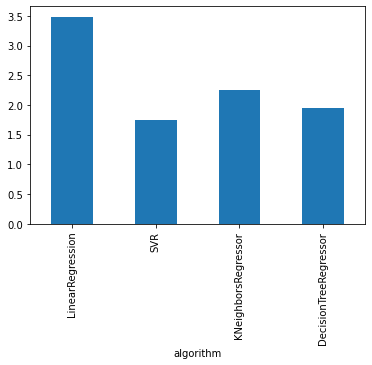

In [4]:
dfGroupBy_algorithm['train_time'].plot.bar();

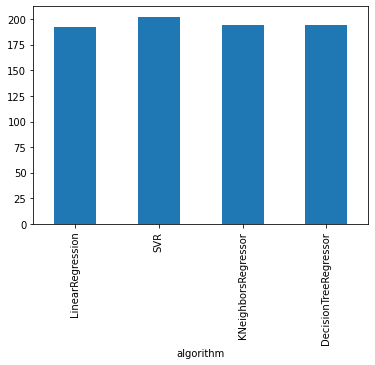

In [5]:
dfGroupBy_algorithm['mem_max'].plot.bar();

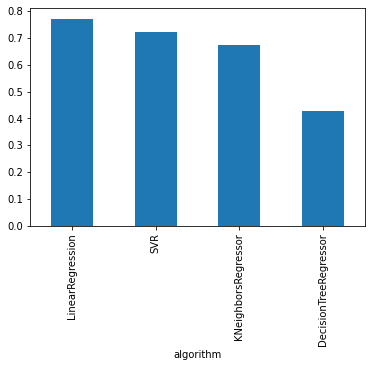

In [6]:
dfGroupBy_algorithm['r2'].plot.bar();

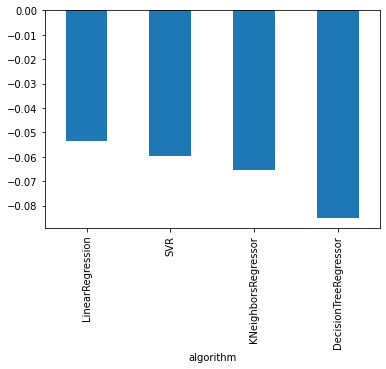

In [7]:
dfGroupBy_algorithm['neg_mean_absolute_error'].plot.bar();

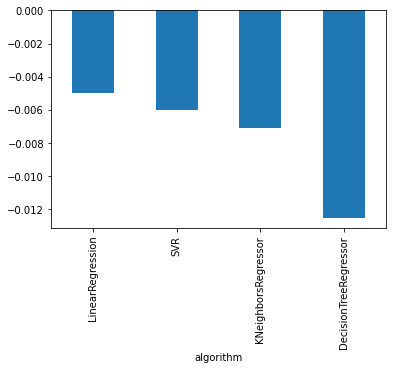

In [8]:
dfGroupBy_algorithm['neg_mean_squared_error'].plot.bar();